--- A2: AND Gate with Step Activation ---
Converged in 130 epochs.
Final weights: [-0.1   0.1   0.05]


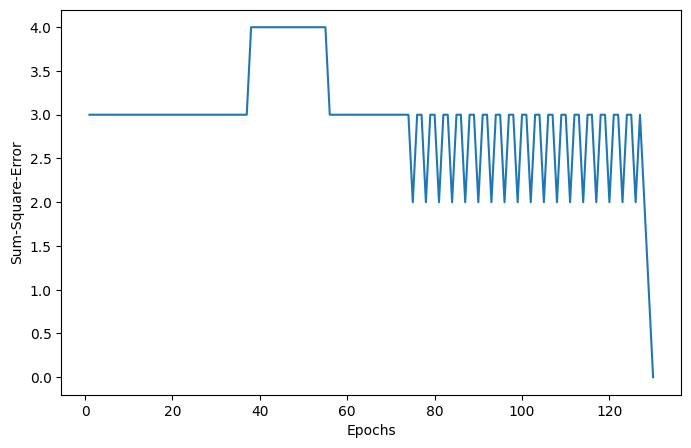


--- A3: AND Gate with other activation functions ---
Bi-Polar Step Activation converged in 1000 epochs.
Sigmoid Activation converged in 1000 epochs.
ReLU Activation converged in 390 epochs.

--- A4: Varying Learning Rates for AND Gate ---


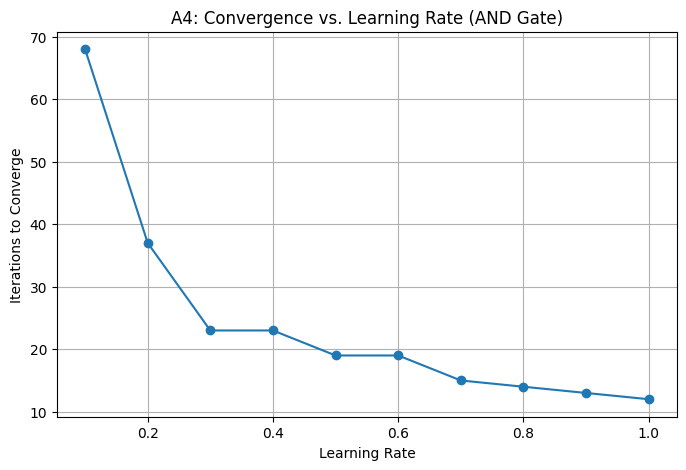


--- A5: XOR Gate ---
XOR Gate with Step function ran for 1000 epochs and did not converge, as expected.

--- A6: Perceptron for fMRI Dataset ---
Error: Could not find 'fmri_gap_cnn_extracted_features.csv'. Skipping A6 and A12.

--- A7: Matrix Pseudo-Inverse for AND Gate ---
Weights calculated by pseudo-inverse: [-0.25  0.5   0.5 ]

--- A8: Backpropagation for AND Gate ---
Backpropagation for AND gate converged in 10000 epochs.

--- A9: Re-evaluating XOR Gate ---
This is a repeat of A5. A single-layer perceptron cannot solve the XOR problem.

--- A11: MLPClassifier from scikit-learn ---
MLPClassifier for AND gate converged in 625 iterations.
MLPClassifier for XOR gate converged in 12 iterations.

--- A12: MLPClassifier for fMRI Dataset ---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# A1: Perceptron Module Functions

# a) Summation unit
def summation_unit(inputs, weights):
    return np.dot(inputs, weights[1:]) + weights[0] # dot product + bias

# b) Activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def bipolar_step_function(x):
    return np.where(x >= 0, 1, -1)

def sigmoid_function(x):
    # Added a clip to prevent overflow warnings with large negative numbers
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return np.maximum(0, x)

# c) Error calculation
def calculate_error(target, prediction):
    return target - prediction

# Main training loop for the perceptron
def train_perceptron(inputs, targets, initial_weights, learning_rate, activation_function, max_epochs=1000, convergence_error=0.002):
    weights = np.array(initial_weights, dtype=float)
    errors_over_epochs = []

    for epoch in range(max_epochs):
        sum_squared_error = 0
        for i in range(len(inputs)):
            prediction = activation_function(summation_unit(inputs[i], weights))
            error = targets[i] - prediction
            sum_squared_error += error**2

            # Update weights
            weights[1:] += learning_rate * error * inputs[i]
            weights[0] += learning_rate * error

        errors_over_epochs.append(sum_squared_error)
        if sum_squared_error <= convergence_error:
            return epoch + 1, errors_over_epochs, weights # Converged

    return max_epochs, errors_over_epochs, weights # Did not converge

# --- A2: AND Gate with Step Activation ---
print("--- A2: AND Gate with Step Activation ---")
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_targets = np.array([0, 0, 0, 1])
initial_weights = [10.0, 0.2, -0.75]
learning_rate = 0.05

epochs_a2, errors_a2, final_weights_a2 = train_perceptron(and_inputs, and_targets, initial_weights, learning_rate, step_function)

print(f"Converged in {epochs_a2} epochs.")
print(f"Final weights: {final_weights_a2}")

# Plotting for A2
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs_a2 + 1), errors_a2)
plt.xlabel("Epochs")
plt.ylabel("Sum-Square-Error")
plt.show()

# --- A3: AND Gate with Bipolar, Sigmoid, and ReLU ---
print("\n--- A3: AND Gate with other activation functions ---")
epochs_bipolar, _, _ = train_perceptron(and_inputs, and_targets, initial_weights, learning_rate, bipolar_step_function)
print(f"Bi-Polar Step Activation converged in {epochs_bipolar} epochs.")

epochs_sigmoid, _, _ = train_perceptron(and_inputs, and_targets, initial_weights, learning_rate, sigmoid_function)
print(f"Sigmoid Activation converged in {epochs_sigmoid} epochs.")

epochs_relu, _, _ = train_perceptron(and_inputs, and_targets, initial_weights, learning_rate, relu_function)
print(f"ReLU Activation converged in {epochs_relu} epochs.")

# --- A4: AND Gate with Varying Learning Rates ---
print("\n--- A4: Varying Learning Rates for AND Gate ---")
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_a4 = [train_perceptron(and_inputs, and_targets, initial_weights, lr, step_function)[0] for lr in learning_rates]

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, iterations_a4, marker='o')
plt.title("A4: Convergence vs. Learning Rate (AND Gate)")
plt.xlabel("Learning Rate")
plt.ylabel("Iterations to Converge")
plt.grid(True)
plt.show()

# --- A5: XOR Gate with a Single-Layer Perceptron ---
print("\n--- A5: XOR Gate ---")
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_targets = np.array([0, 1, 1, 0])
epochs_xor, _, _ = train_perceptron(xor_inputs, xor_targets, initial_weights, learning_rate, step_function)
print(f"XOR Gate with Step function ran for {epochs_xor} epochs and did not converge, as expected.")


# --- A6: Perceptron on Your fMRI Dataset ---
print("\n--- A6: Perceptron for fMRI Dataset ---")
try:
    # Load data from the specified CSV file path
    df = pd.read_csv("../fmri_gap_cnn_extracted_features.csv")
    fmri_features = df[['fmri_feature_14', 'fmri_feature_15']].values
    fmri_labels = df['label'].values
    DATA_LOADED = True
except FileNotFoundError:
    print("Error: Could not find 'fmri_gap_cnn_extracted_features.csv'. Skipping A6 and A12.")
    DATA_LOADED = False

if DATA_LOADED:
    # Initialize weights for the 2 features + bias
    initial_weights_a6 = np.random.rand(3) * 0.1
    epochs_fmri, errors_fmri, _ = train_perceptron(fmri_features, fmri_labels, initial_weights_a6, 0.01, sigmoid_function)

    print(f"fMRI data perceptron stopped after {epochs_fmri} epochs.")

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs_fmri + 1), errors_fmri)
    plt.title("A6: Perceptron Learning Curve for fMRI Data")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Square-Error")
    plt.grid(True)
    plt.show()

# --- A7: Matrix Pseudo-Inverse Method ---
print("\n--- A7: Matrix Pseudo-Inverse for AND Gate ---")
X_and = np.c_[np.ones(and_inputs.shape[0]), and_inputs] # Add bias column
weights_pinv = np.linalg.pinv(X_and).dot(and_targets)
print(f"Weights calculated by pseudo-inverse: {weights_pinv}")

# --- A8: Neural Network with Backpropagation ---
print("\n--- A8: Backpropagation for AND Gate ---")
def sigmoid_derivative(x):
    return x * (1 - x)

def train_backprop_and(learning_rate=0.05, max_epochs=10000, convergence_error=0.002):
    # Network setup
    hidden_weights = np.random.uniform(size=(2, 2))
    hidden_bias = np.random.uniform(size=(1, 2))
    output_weights = np.random.uniform(size=(2, 1))
    output_bias = np.random.uniform(size=(1, 1))

    for epoch in range(max_epochs):
        # Forward pass
        hidden_activation = np.dot(and_inputs, hidden_weights) + hidden_bias
        hidden_output = sigmoid_function(hidden_activation)
        output_activation = np.dot(hidden_output, output_weights) + output_bias
        pred_out = sigmoid_function(output_activation)

        # Error calculation
        error = and_targets.reshape(-1, 1) - pred_out
        if np.sum(error**2) <= convergence_error:
            return epoch + 1

        # Backward pass
        d_pred_out = error * sigmoid_derivative(pred_out)
        err_hidden = d_pred_out.dot(output_weights.T)
        d_hidden = err_hidden * sigmoid_derivative(hidden_output)

        # Update weights and biases
        output_weights += hidden_output.T.dot(d_pred_out) * learning_rate
        output_bias += np.sum(d_pred_out, axis=0, keepdims=True) * learning_rate
        hidden_weights += and_inputs.T.dot(d_hidden) * learning_rate
        hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
    return max_epochs

epochs_bp = train_backprop_and()
print(f"Backpropagation for AND gate converged in {epochs_bp} epochs.")

# --- A9: Repeat A1 for XOR Gate ---
print("\n--- A9: Re-evaluating XOR Gate ---")
print("This is a repeat of A5. A single-layer perceptron cannot solve the XOR problem.")

# --- A11: MLPClassifier for AND and XOR Gates ---
print("\n--- A11: MLPClassifier from scikit-learn ---")
# AND Gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=2000, random_state=1)
mlp_and.fit(and_inputs, and_targets)
print(f"MLPClassifier for AND gate converged in {mlp_and.n_iter_} iterations.")

# XOR Gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=2000, random_state=1)
mlp_xor.fit(xor_inputs, xor_targets)
print(f"MLPClassifier for XOR gate converged in {mlp_xor.n_iter_} iterations.")

# --- A12: MLPClassifier on fMRI Dataset ---
print("\n--- A12: MLPClassifier for fMRI Dataset ---")
if DATA_LOADED:
    # Scale features for better MLP performance
    scaler = StandardScaler()
    fmri_features_scaled = scaler.fit_transform(fmri_features)

    mlp_fmri = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=1)
    mlp_fmri.fit(fmri_features_scaled, fmri_labels)

    print(f"MLPClassifier training completed in {mlp_fmri.n_iter_} iterations.")
    accuracy = mlp_fmri.score(fmri_features_scaled, fmri_labels)
    print(f"Training set accuracy: {accuracy:.4f}")